# **This is the first version of this notebook, which applies logistic regression to classify credit risk using the German Credit Numeric dataset from UCI.**

link: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

In [ ]:
# Loading the packages
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, precision_recall_curve, auc

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

# Step 1 Loading the dataset into a DataFrame

In [ ]:
credit_df = pd.read_csv("/content/drive/MyDrive/credit_dataset_numeric.csv", header=0, sep=",")
print(credit_df.head())
print(credit_df.describe(include='all'))



   credit.rating  account.balance  credit.duration.months  \
0              1                1                      18   
1              1                1                       9   
2              1                2                      12   
3              1                1                      12   
4              1                1                      12   

   previous.credit.payment.status  credit.purpose  credit.amount  savings  \
0                               3               2           1049        1   
1                               3               4           2799        1   
2                               2               4            841        2   
3                               3               4           2122        1   
4                               3               4           2171        1   

   employment.duration  installment.rate  marital.status  ...  \
0                    1                 4               1  ...   
1                    2                 2

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

# Step 2: Preprocessing

In [ ]:
# Function to transform variables into categories
def to_factors(df, variables):
    for variable in variables:
        df[variable] = df[variable].astype('category')  # Converts specified variables to category type
    return df

# Function to normalize numeric variables
def scale_features(df, variables):
    scaler = StandardScaler()  # Initializes the scaler
    df[variables] = scaler.fit_transform(df[variables])  # Applies scaling to the numeric variables
    return df


In [ ]:
# Normalizing the variables
numeric_vars = ["credit.duration.months", "age", "credit.amount"]
credit_df = scale_features(credit_df, numeric_vars)

# Fixing column names (dots to underscores)
credit_df.columns = [col.replace('.', '_') for col in credit_df.columns]

# Updating the list of categorical variables (with underscores)
categorical_vars = [
    'credit_rating', 'account_balance', 'previous_credit_payment_status',
    'credit_purpose', 'savings', 'employment_duration', 'installment_rate',
    'marital_status', 'guarantor', 'residence_duration', 'current_assets',
    'other_credits', 'apartment_type', 'bank_credits', 'occupation',
    'dependents', 'telephone', 'foreign_worker'
]

# Converting to categorical type
credit_df = to_factors(df=credit_df, variables=categorical_vars)

# Checking the DataFrame
print(credit_df.head())
print(credit_df.describe(include='all'))






  credit_rating account_balance  credit_duration_months  \
0             1               1               -0.240857   
1             1               1               -0.987573   
2             1               2               -0.738668   
3             1               1               -0.738668   
4             1               1               -0.738668   

  previous_credit_payment_status credit_purpose  credit_amount savings  \
0                              3              2      -0.787657       1   
1                              3              4      -0.167384       1   
2                              2              4      -0.861381       2   
3                              3              4      -0.407341       1   
4                              3              4      -0.389974       1   

  employment_duration installment_rate marital_status  ... residence_duration  \
0                   1                4              1  ...                  4   
1                   2                2

In [ ]:
# Splitting the data into training and testing sets (60% train, 40% test)
train_df, test_df = train_test_split(credit_df, test_size=0.4, random_state=10, stratify=credit_df['credit_rating'])

# Separating independent variables (X) and dependent variable (y)
X_train = train_df.drop(columns=['credit_rating'])
y_train = train_df['credit_rating']
X_test = test_df.drop(columns=['credit_rating'])
y_test = test_df['credit_rating']



# Step 4 - Feature Selection

In [ ]:

model = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_].tolist()

# Step 5: Full Model with All Variables

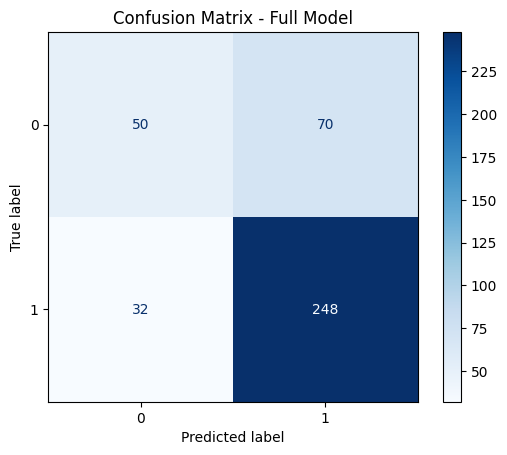

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.42      0.50       120
           1       0.78      0.89      0.83       280

    accuracy                           0.74       400
   macro avg       0.69      0.65      0.66       400
weighted avg       0.73      0.74      0.73       400



In [ ]:
# Building and evaluating the full model
model_full = LogisticRegression(max_iter=1000, solver='liblinear')
model_full.fit(X_train, y_train)  # Fit the model using all features
y_pred_full = model_full.predict(X_test)  # Make predictions on the test set
y_prob_full = model_full.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
auc_full = roc_auc_score(y_test, y_prob_full)  # Calculate AUC score

# 1. Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Full Model')
plt.show()

# 2. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_full))


# Step 6: Optimized Model with Selected Features

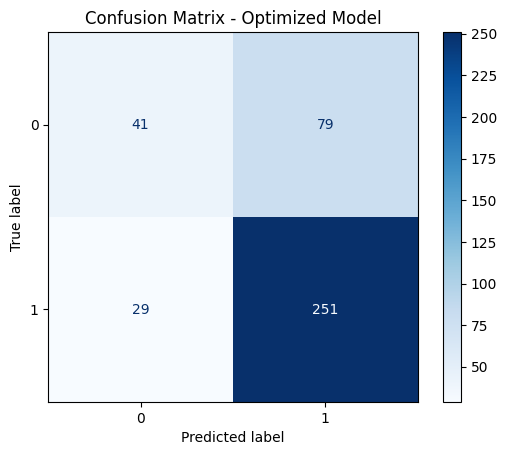

Classification Report - Optimized Model:
              precision    recall  f1-score   support

           0       0.59      0.34      0.43       120
           1       0.76      0.90      0.82       280

    accuracy                           0.73       400
   macro avg       0.67      0.62      0.63       400
weighted avg       0.71      0.73      0.71       400



In [ ]:
# Building and evaluating the optimized Model with Selected Features

model_opt = LogisticRegression(max_iter=1000, solver='liblinear')
model_opt.fit(X_train[selected_features], y_train)  # Fit model with selected features
y_pred_opt = model_opt.predict(X_test[selected_features])  # Make predictions
y_prob_opt = model_opt.predict_proba(X_test[selected_features])[:, 1]  # Get probabilities for class 1
auc_opt = roc_auc_score(y_test, y_prob_opt)  # Calculate AUC score

# 1. Confusion Matrix
conf_mat_opt = confusion_matrix(y_test, y_pred_opt)
disp_opt = ConfusionMatrixDisplay(confusion_matrix=conf_mat_opt)
disp_opt.plot(cmap='Blues')
plt.title('Confusion Matrix - Optimized Model')
plt.show()

# 2. Classification Report
print("Classification Report - Optimized Model:")
print(classification_report(y_test, y_pred_opt))


# Step 7: ROC and PR Curves

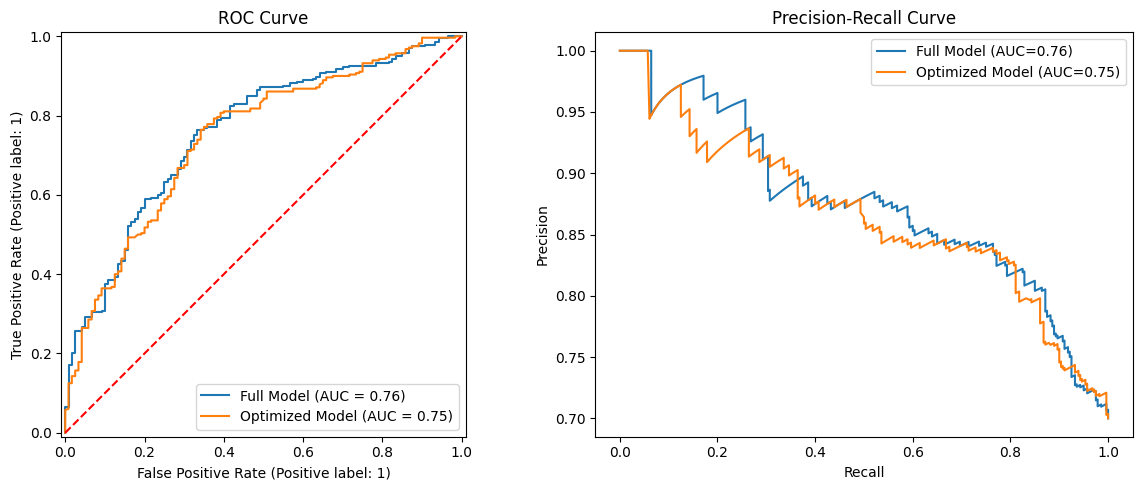

(['account_balance',
  'credit_duration_months',
  'previous_credit_payment_status',
  'credit_purpose',
  'savings',
  'current_assets',
  'occupation',
  'dependents',
  'telephone',
  'foreign_worker'],
 np.float64(0.7582142857142857),
 np.float64(0.745654761904762),
 array([[ 50,  70],
        [ 32, 248]]),
 array([[ 41,  79],
        [ 29, 251]]))

In [ ]:
# =====================

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob_full, ax=axs[0], name='Full Model')
RocCurveDisplay.from_predictions(y_test, y_prob_opt, ax=axs[0], name='Optimized Model')
axs[0].plot([0, 1], [0, 1], 'r--')
axs[0].set_title('ROC Curve')

# Precision-Recall Curve
precision_full, recall_full, _ = precision_recall_curve(y_test, y_prob_full)
precision_opt, recall_opt, _ = precision_recall_curve(y_test, y_prob_opt)
axs[1].plot(recall_full, precision_full, label=f'Full Model (AUC={auc_full:.2f})')
axs[1].plot(recall_opt, precision_opt, label=f'Optimized Model (AUC={auc_opt:.2f})')
axs[1].set_title('Precision-Recall Curve')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].legend()

plt.tight_layout()
plt.show()

# Return selected features, AUC scores, and confusion matrices
(selected_features, auc_full, auc_opt, confusion_matrix(y_test, y_pred_full), confusion_matrix(y_test, y_pred_opt))
